In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Load the dataset
data = pd.read_csv('Platinum_data.csv')

In [3]:
# Data Inspection
print(data.head())

         date   open   high         low       close  volume
0  2000-01-04  428.0  430.0  421.000000  429.700012     632
1  2000-01-05  428.0  428.0  416.899994  419.899994     571
2  2000-01-06  415.0  417.0  409.000000  412.000000     494
3  2000-01-07  408.0  417.0  408.000000  414.000000     130
4  2000-01-10  414.0  415.0  414.000000  415.000000      24


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5327 entries, 0 to 5326
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5327 non-null   object 
 1   open    5327 non-null   float64
 2   high    5327 non-null   float64
 3   low     5327 non-null   float64
 4   close   5327 non-null   float64
 5   volume  5327 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 249.8+ KB
None


In [5]:
print(data.isnull().sum())

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [6]:
# Convert the 'date' column to datetime type
data['date'] = pd.to_datetime(data['date'])

In [7]:
# Sort the DataFrame based on the 'date' column
data.sort_index(inplace=True)

In [8]:
print(data.describe())

              open         high          low        close        volume
count  5327.000000  5327.000000  5327.000000  5327.000000   5327.000000
mean   1059.614041  1062.804956  1056.683461  1060.008522    342.250047
std     364.722097   364.482616   364.941415   364.711202   1211.402414
min     406.000000   415.000000   406.000000   412.000000      0.000000
25%     848.350006   851.100006   845.000000   848.300018      0.000000
50%     966.400024   969.500000   964.500000   967.299988      6.000000
75%    1339.200012  1342.949951  1337.599976  1341.349976    102.500000
max    2251.100098  2251.100098  2251.100098  2251.100098  17489.000000


In [9]:
from sklearn.preprocessing import StandardScaler
df = data
features = df[['open', 'high', 'low', 'volume']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [10]:
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(data[['open', 'high', 'low', 'close', 'volume']])

# Define a threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)

# Print and handle outliers
print("Number of outliers:", outliers.sum())
print("Outliers:", data[outliers])
# Handle outliers as needed (e.g., removing or replacing them)
data = data[~outliers]

Number of outliers: 86
Outliers:            date         open         high          low        close  volume
1105 2004-12-08   867.500000   867.500000   813.000000   834.099976    7846
1213 2005-05-16   865.000000   866.000000   846.500000   849.299988    4046
1306 2005-09-27   919.799988   923.000000   916.000000   918.000000    6646
1402 2006-05-31  1290.000000  1290.000000  1235.000000  1246.800049    4617
1595 2007-10-29  1468.000000  1468.000000  1468.000000  1468.000000    4361
...         ...          ...          ...          ...          ...     ...
4943 2022-06-28   911.200012   911.500000   910.599976   910.599976    7007
5007 2022-09-28   871.099976   871.099976   871.099976   871.099976    7446
5194 2023-06-28   923.400024   923.400024   923.400024   923.400024    7773
5257 2023-09-27   886.799988   886.799988   886.799988   886.799988    9397
5320 2023-12-27   981.500000  1000.099976   981.500000  1000.099976    6515

[86 rows x 6 columns]


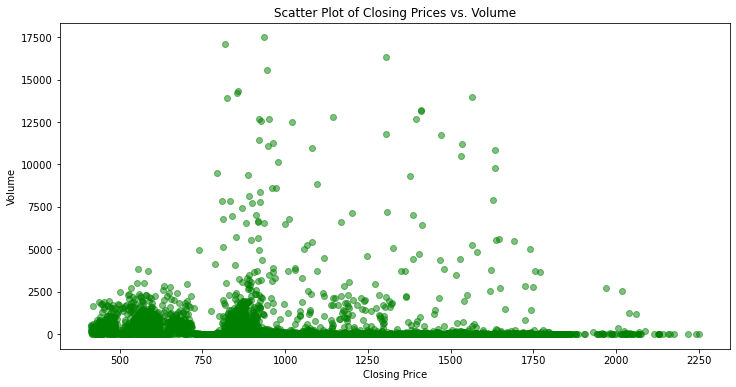

In [11]:
# Set the figure size

plt.figure(figsize=(12, 6))

# Scatter plot of closing prices vs. volume
plt.scatter(df['close'], df['volume'], color='green', alpha=0.5)

# Adding labels and title
plt.title('Scatter Plot of Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')

# Display the plot
plt.show()

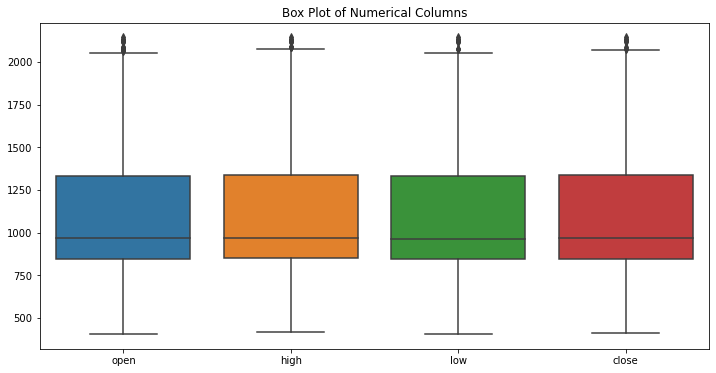

In [12]:
import seaborn as sns

# Create box plots for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['open', 'high', 'low', 'close']])
plt.title('Box Plot of Numerical Columns')
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Specify columns to be scaled
columns_to_scale = ['open', 'high', 'low', 'close', 'volume']

# Apply Min-Max scaling to specified columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


/var/folders/c3/31lxf9qn7j9d6_tt0kxwvg3h0000gn/T/ipykernel_15046/1913872928.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


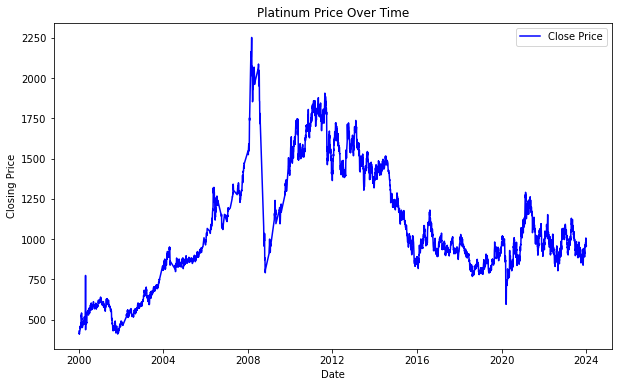

In [14]:
import matplotlib.pyplot as plt
# Plotting the closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.title('Platinum Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

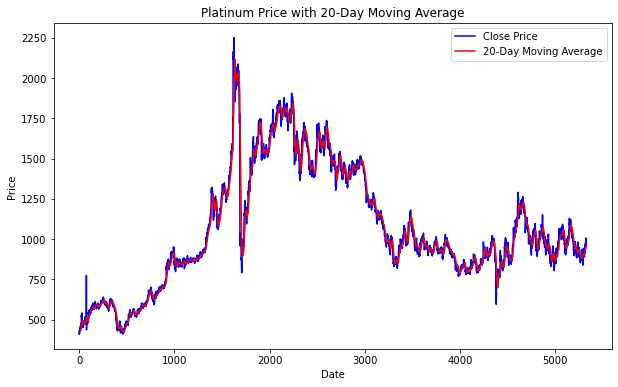

In [15]:
# Moving Average Plot
plt.figure(figsize=(10, 6))
df['close'].plot(label='Close Price', color='blue')
df['close'].rolling(window=20).mean().plot(label='20-Day Moving Average', color='red')
plt.title('Platinum Price with 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean Squared Error (Test): 23.204467560267002
R-squared (Test): 0.999834189622571
Mean Absolute Error (Test): 2.1461516281874355
Root Mean Squared Error (Test): 4.817101572550344
Predicted Prices for the Next 10 Days:
2024-01-08: 958.843176
2024-01-09: 958.843176
2024-01-10: 958.843176
2024-01-11: 958.843176
2024-01-12: 958.843176
2024-01-15: 958.843176
2024-01-16: 958.843176
2024-01-17: 958.843176
2024-01-18: 958.843176
2024-01-19: 958.843176


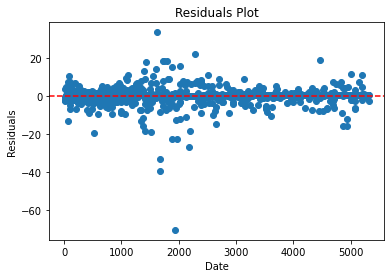

In [16]:
# Extracting relevant columns with more descriptive variable names
training_features = df[['open', 'high', 'low', 'volume']]
training_targets = df['close']

# Splitting the data into training and testing sets
training_features, testing_features, training_targets, testing_targets = train_test_split(
    training_features, training_targets, test_size=0.2, random_state=42
)

# Normalize the data 
scaler = StandardScaler()
training_features_scaled = scaler.fit_transform(training_features)
training_features = pd.DataFrame(training_features_scaled, columns=training_features.columns)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(training_features, training_targets)

# Making predictions on the test set
testing_features_scaled = scaler.transform(testing_features)
predictions_test = model.predict(testing_features_scaled)

# Evaluating the model on the test set using multiple metrics
mse_test = mean_squared_error(testing_targets, predictions_test)
r2_test = r2_score(testing_targets, predictions_test)
mae_test = mean_absolute_error(testing_targets, predictions_test)
rmse_test = mean_squared_error(testing_targets, predictions_test, squared=False)

print(f'Mean Squared Error (Test): {mse_test}')
print(f'R-squared (Test): {r2_test}')
print(f'Mean Absolute Error (Test): {mae_test}')
print(f'Root Mean Squared Error (Test): {rmse_test}')

# Predicting the next 10 prices
last_date = df['date'].max()
last_price_data = df[df['date'] == last_date][['open', 'high', 'low', 'volume']]
future_dates = pd.date_range(last_date, periods=11, freq='B')[1:]
future_features = pd.DataFrame(index=future_dates, columns=training_features.columns)
future_features.loc[:, :] = last_price_data.values

future_features_scaled = scaler.transform(future_features)
future_predictions = model.predict(future_features_scaled)

# Print the predictions
print("Predicted Prices for the Next 10 Days:")
for date, price in zip(future_dates, future_predictions):
    print(f"{date.date()}: {price:.6f}")

# Visualizing residuals
residuals = testing_targets - predictions_test
plt.scatter(testing_targets.index, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()